# CaliforniaHouse Price data

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settings
%matplotlib inline

## Configuration

In [ ]:
csv_file = settings.APP_FOLDER / 'data' /'california-housing-prices-data-extra-features'/ 'California_Houses.csv'

In [2]:
df = pd.read_csv(csv_file)

df.shape

In [3]:
df.sample(5)

(20640, 14)

## EDA

In [ ]:
df.isna().sum()

In [5]:
df.info()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [6]:
# pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [7]:
df.hist(figsize=(12,9))
plt.tight_layout()
plt.show()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


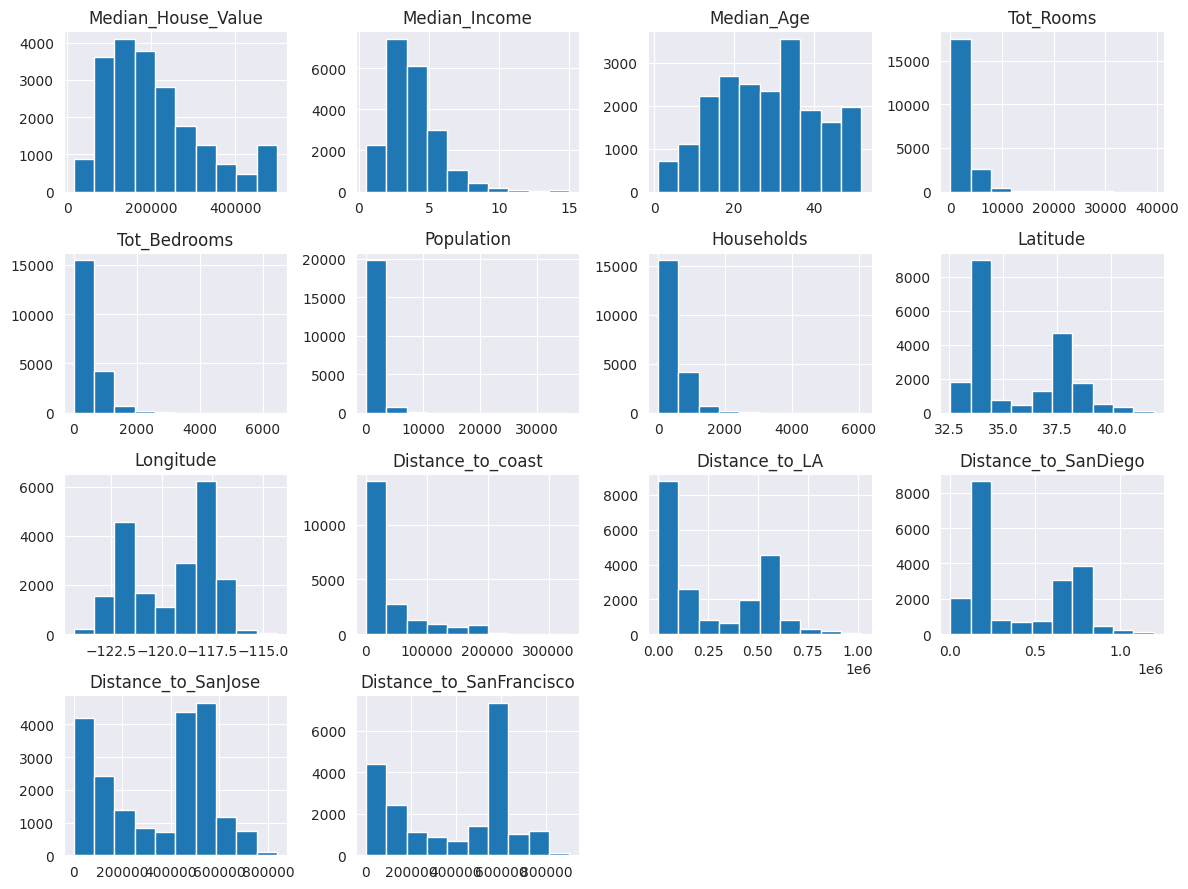

In [8]:
sns.boxplot(data=df, orient='h')

### Correlation

In [ ]:
df.corr()

In [10]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='YlGnBu', annot_kws={"size": 10})
#sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248


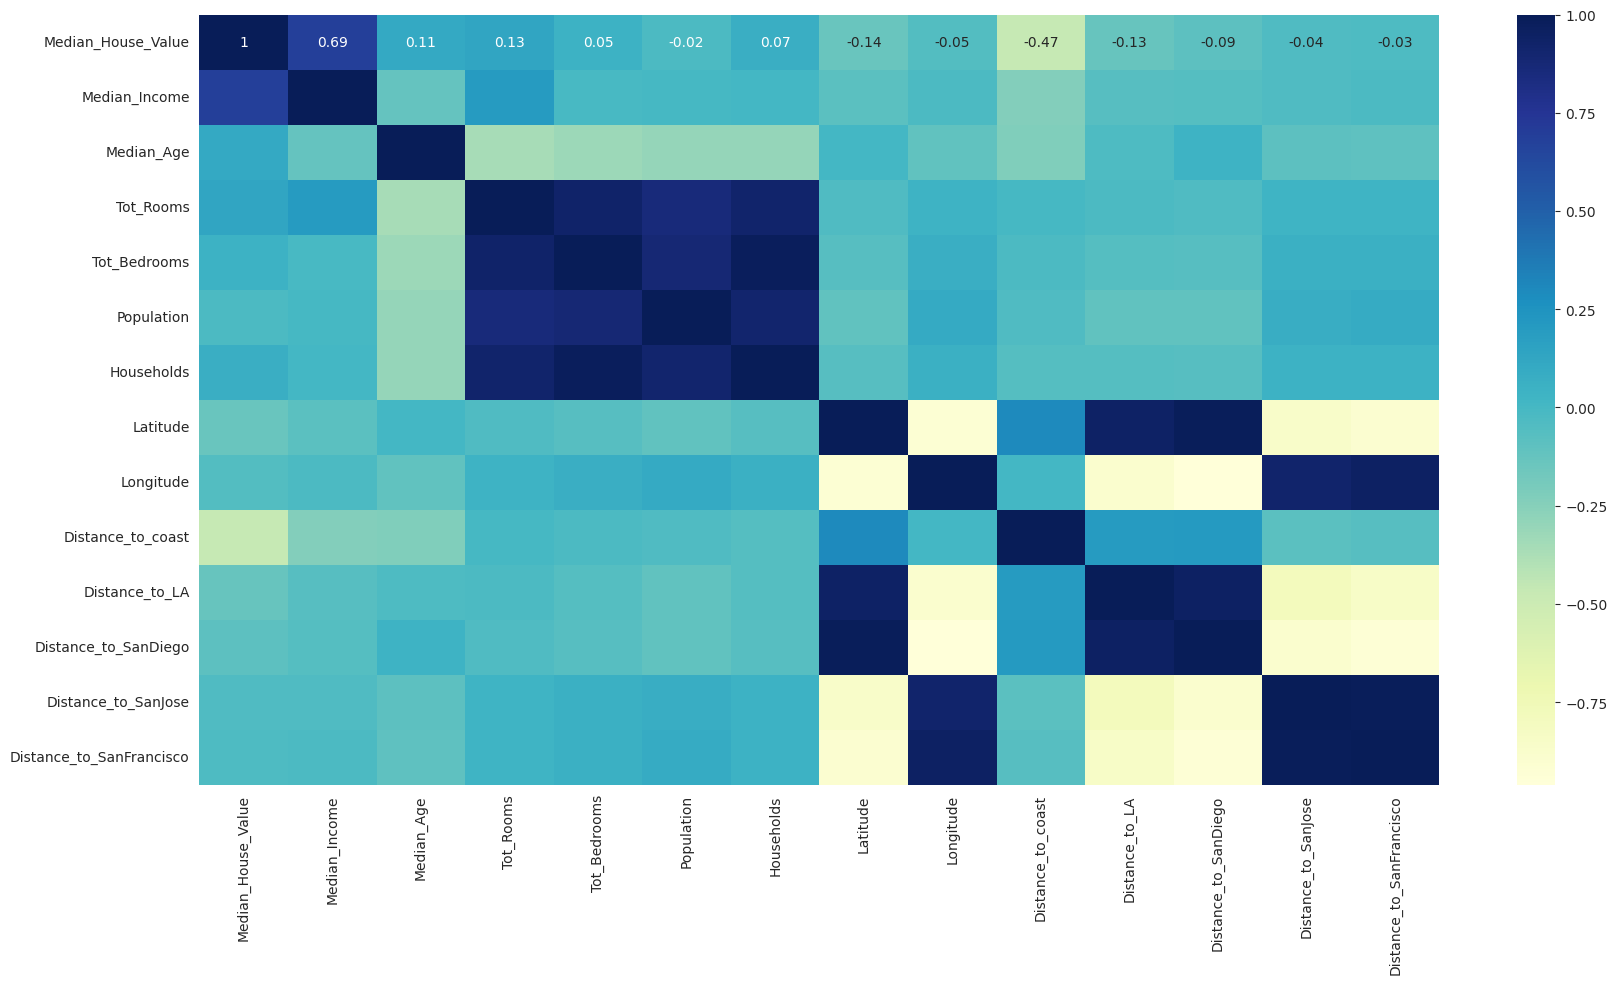

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
cax = ax.imshow(df.corr()) #, cmap='YlGnBu')
fig.colorbar(cax)
for (i, j), z in np.ndenumerate(df.corr()):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.show()

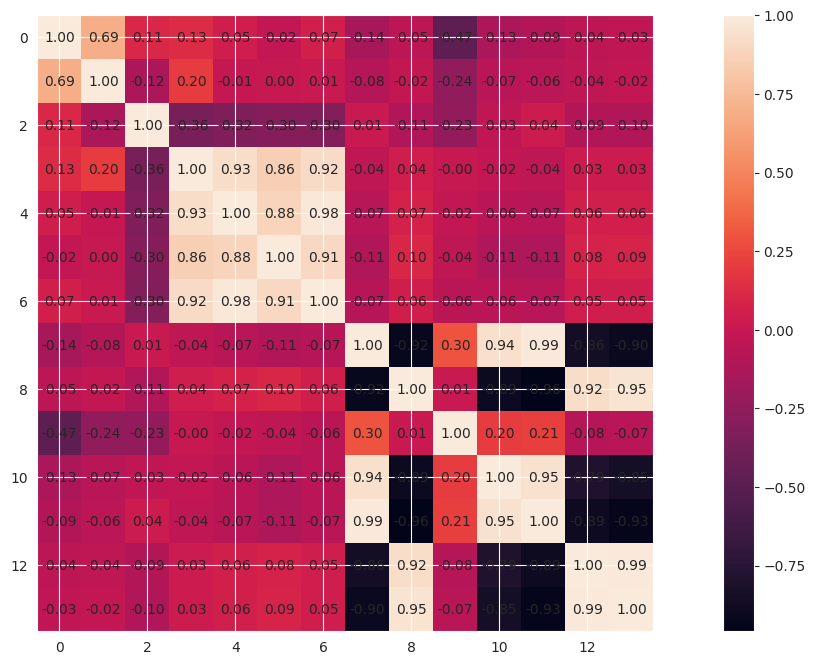

In [12]:
sns.__version__

In [13]:
pd.__version__

'0.12.2'

In [14]:
import matplotlib
print(f'Pandas    : {pd.__version__}')
print(f'Seaborn   : {sns.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')

'2.1.1'

In [15]:
! cat /etc/os-release

Pandas    : 2.1.1
Seaborn   : 0.12.2
Matplotlib: 3.8.0


In [16]:
sns.heatmap(
    pd.DataFrame({
        'wanna': {'ACAD': 53, 'MAG': 490, 'NEWS': 249}, 
        'gonna': {'ACAD': 202, 'MAG': 1974, 'NEWS': 1207}}), 
    annot=True)

NAME="Pop!_OS"
VERSION="22.04 LTS"
ID=pop
ID_LIKE="ubuntu debian"
PRETTY_NAME="Pop!_OS 22.04 LTS"
VERSION_ID="22.04"
HOME_URL="https://pop.system76.com"
SUPPORT_URL="https://support.system76.com"
BUG_REPORT_URL="https://github.com/pop-os/pop/issues"
PRIVACY_POLICY_URL="https://system76.com/privacy"
VERSION_CODENAME=jammy
UBUNTU_CODENAME=jammy
LOGO=distributor-logo-pop-os


<Axes: >

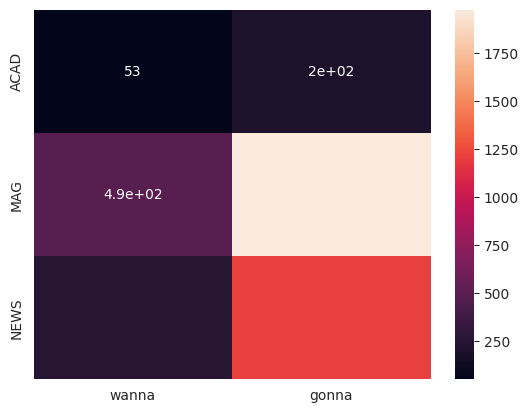

In [17]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
Median_House_Value,1.000000,0.688075,0.105623,0.134153,0.050594,-0.024650,0.065843,-0.144160,-0.045967,-0.469350,-0.130678,-0.092510,-0.041590,-0.030559
Median_Income,0.688075,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176,-0.243443,-0.065421,-0.055253,-0.036796,-0.022424
Median_Age,0.105623,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197,-0.226621,-0.031435,0.036113,-0.089753,-0.101447
Tot_Rooms,0.134153,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568,-0.001540,-0.019777,-0.038935,0.031862,0.032920
Tot_Bedrooms,0.050594,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378,-0.022290,-0.055809,-0.067627,0.059663,0.060250
Population,-0.024650,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773,-0.040273,-0.110407,-0.109691,0.079117,0.088618
Households,0.065843,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310,-0.062035,-0.062118,-0.069091,0.047861,0.050157
Latitude,-0.144160,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664,0.303645,0.941857,0.991571,-0.855075,-0.897397
Longitude,-0.045967,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000,0.007865,-0.892026,-0.958315,0.923991,0.954864
Distance_to_coast,-0.469350,-0.243443,-0.226621,-0.001540,-0.022290,-0.040273,-0.062035,0.303645,0.007865,1.000000,0.197672,0.214531,-0.077524,-0.068248
